In [365]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

import warnings
warnings.filterwarnings('ignore')

In [366]:
pred_keys = {'BayesSpace': 'spatial.cluster',
             'conST': 'refine',
             'DeepST': 'DeepST_refine_domain',
             'GraphST': 'domain',
             'PRECAST': 'cluster',
             'SEDR': 'SEDR',
             'Seurat': 'seurat_clusters',
             'SpaceFlow': 'pred',
             'SpaGCN': 'refined_pred',
             'STAGATE': 'STAGATE',
             'stLearn': 'X_pca_kmeans'}

In [367]:
method = 'stLearn'
pred_key = pred_keys[method]
dataset = 'DLPFC'

data_folder = f'../data/{dataset}'
input_dir = f'../Results/results_old/{dataset}/{method}'
output_dir = f'../Results/results_trajectory/{dataset}/{method}'
os.makedirs(output_dir, exist_ok=True)

files = glob.glob(input_dir + '/*')
files = [f for f in files if os.path.isdir(f)]

print(method)

stLearn
['../Results/results_old/DLPFC/stLearn/151669', '../Results/results_old/DLPFC/stLearn/151671', '../Results/results_old/DLPFC/stLearn/151675', '../Results/results_old/DLPFC/stLearn/151672', '../Results/results_old/DLPFC/stLearn/151674', '../Results/results_old/DLPFC/stLearn/151673', '../Results/results_old/DLPFC/stLearn/151670', '../Results/results_old/DLPFC/stLearn/151510', '../Results/results_old/DLPFC/stLearn/151509', '../Results/results_old/DLPFC/stLearn/151507', '../Results/results_old/DLPFC/stLearn/151508', '../Results/results_old/DLPFC/stLearn/151676']


In [368]:
from scipy.optimize import linear_sum_assignment
def assign_labels(adata):
    gt = adata.obs['gt'].values
    pred = adata.obs['pred'].values

    gt_labels = np.unique(gt)
    pred_labels = np.unique(pred)
    
    contingency_table = pd.crosstab(gt, pred).reindex(index=gt_labels, columns=pred_labels, fill_value=0)

    # Hungarian matching
    cost_matrix = -contingency_table.values.T # To map pred -> gt
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = {pred_labels[row]: gt_labels[col] for row, col in zip(row_ind, col_ind)}

    # Greedy matching
    # mapping = contingency_table.idxmax(axis=1).to_dict()

    adata.obs['labels'] = adata.obs['pred'].map(mapping)

    print(contingency_table)
    print(mapping)
    return adata

In [369]:
def process_adata(adata):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    return adata    

def plot_trajectory(adata, out_path):
    fix, ax = plt.subplots(figsize=(6, 6))
    sc.tl.paga(adata, groups='labels')
    sc.pl.paga(
        adata, 
        show=False, 
        plot=True,
        fontsize=13,
        ax=ax,
        text_kwds={"color": "#555555"}
    )
    #  Remove plot borders (spines)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Save the figure
    plt.savefig(os.path.join(out_path, 'trajectory.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(out_path, 'trajectory.pdf'), format='pdf', bbox_inches='tight')
    plt.show()

================= Processing stLearn DLPFC =================
[1] Processing 151669
col_0      1    2    3    4    5
row_0                           
Layer3  1012  954  151   24    0
Layer4   173   11    0  180    0
Layer5     1    3    0  506    0
Layer6     1    5    0  381    4
WM         2    0    0   71  157
{'1': 'Layer4', '2': 'Layer3', '3': 'Layer6', '4': 'Layer5', '5': 'WM'}


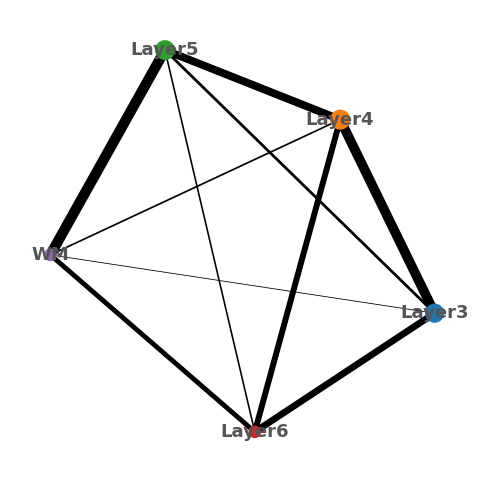

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151669
[2] Processing 151671
col_0     1    2    3    4    5
row_0                          
Layer3  981    4   12  512  409
Layer4   28    0    0    0  217
Layer5   27    0   95    0  599
Layer6   15    0  696    0   49
WM        6  392   51    0    0
{'1': 'Layer3', '2': 'WM', '3': 'Layer6', '4': 'Layer4', '5': 'Layer5'}


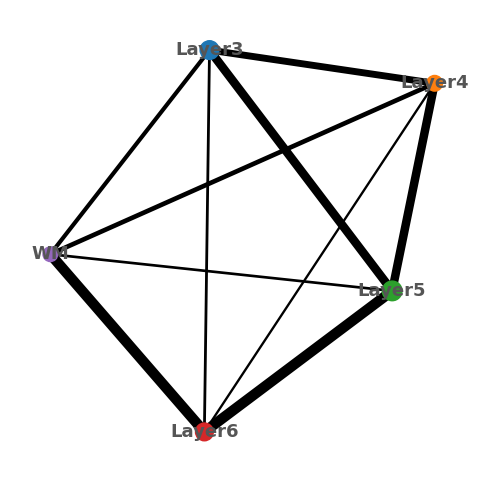

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151671
[3] Processing 151675
col_0     1    2   3    4    5    6    7
row_0                                   
Layer1    3  325   0    0    0    0    0
Layer2  219   56   0    0    0    0    0
Layer3  371  140   0  256    4    0    0
Layer4    1   17   0  257    0    0    0
Layer5    0   26   1  588  117    0    0
Layer6    0  105  46    4  374    4    0
WM        0   13  16    0   30  258  335
{'1': 'Layer3', '2': 'Layer1', '3': 'Layer4', '4': 'Layer5', '5': 'Layer6', '6': 'Layer2', '7': 'WM'}


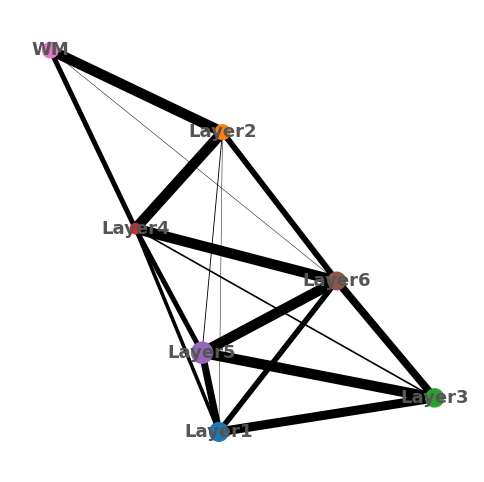

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151675
[4] Processing 151672
col_0     1    2    3    4    5
row_0                          
Layer3    1    0  597   69  908
Layer4    0    1    5  107  191
Layer5    2    0    0  595  131
Layer6  176    1    1  665   39
WM      136  263    0    0    0
{'1': 'Layer6', '2': 'WM', '3': 'Layer4', '4': 'Layer5', '5': 'Layer3'}


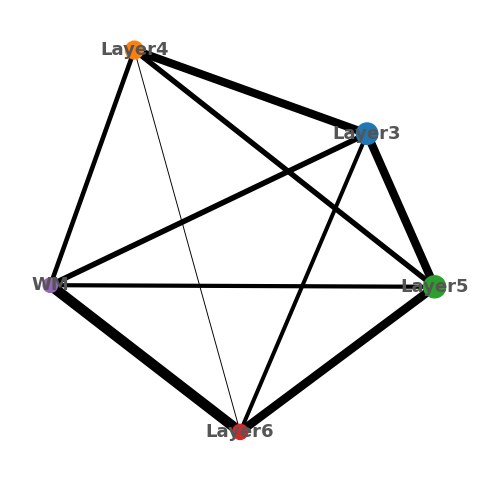

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151672
[5] Processing 151674
col_0     1    2    3    4    5    6   7
row_0                                   
Layer1   10    0    2  368    0    0   0
Layer2  187    0    2   33    2    0   0
Layer3  413    0   99   16  386   10   0
Layer4    0    0  112    1  131    3   0
Layer5    0    0  352    2  255   12   0
Layer6    0    5  252    0   53  304   0
WM        0  500    5    0    0  103  17
{'1': 'Layer2', '2': 'WM', '3': 'Layer5', '4': 'Layer1', '5': 'Layer3', '6': 'Layer6', '7': 'Layer4'}


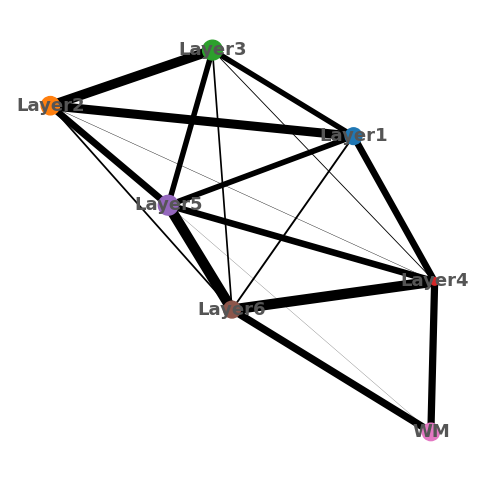

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151674
[6] Processing 151673
col_0     1    2   3    4    5    6    7
row_0                                   
Layer1  246    6   0    0   19    2    0
Layer2   14  202   0    0   37    0    0
Layer3    4  508   0    0  177    0  300
Layer4    0    0   0    0   39    0  179
Layer5    1    0   0    0  100    0  572
Layer6   16    0   6    5  260  179  226
WM        0    0  19  369    0  125    0
{'1': 'Layer1', '2': 'Layer3', '3': 'Layer4', '4': 'WM', '5': 'Layer6', '6': 'Layer2', '7': 'Layer5'}


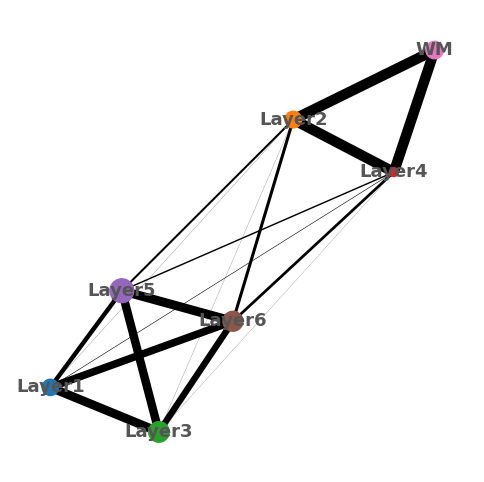

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151673
[7] Processing 151670
col_0     1    2    3    4    5
row_0                          
Layer3    0  807  192  999  177
Layer4    0    1    0   45  165
Layer5    0    0    1   27  553
Layer6    1    0    0    6  301
WM      128    0    0   11   70
{'1': 'WM', '2': 'Layer4', '3': 'Layer6', '4': 'Layer3', '5': 'Layer5'}


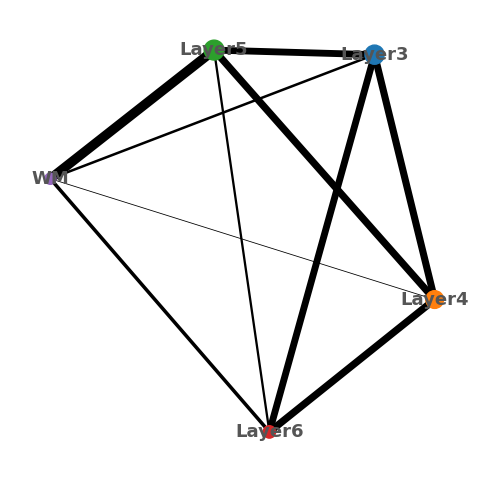

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151670
[8] Processing 151510
col_0     1    2    3    4    5     6    7
row_0                                     
Layer1  279    0  528  294    0     0   79
Layer2    0    0   22    0    0     9  619
Layer3    0    0   14    0    0  1213  547
Layer4    0   89    3    0    0   226    0
Layer5    0  297    1    0    0    12    0
Layer6    0  158   14    6    0     1    0
WM        3   12   17    8  144     0    0
{'1': 'Layer4', '2': 'Layer5', '3': 'Layer1', '4': 'Layer6', '5': 'WM', '6': 'Layer3', '7': 'Layer2'}


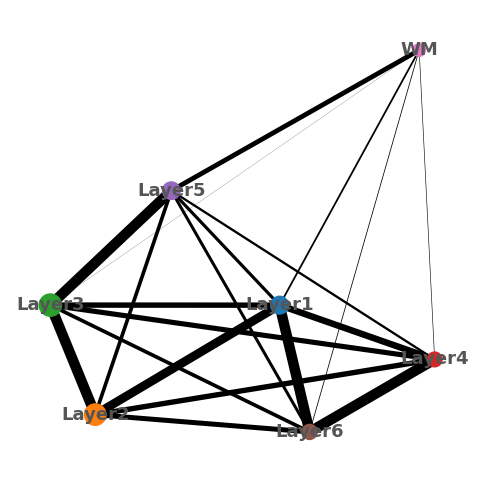

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151510
[9] Processing 151509
col_0     1     2    3    4    5   6    7
row_0                                    
Layer1  358     0  773    0   58   0    0
Layer2   10     2    7    0  582   0    1
Layer3    1  1133    3    0  747   0    0
Layer4    0   339    0    0    0   0   30
Layer5    0   176    0    0    0   5  182
Layer6    0     5    0    0    0  98  112
WM        0     1    0  141    0  20    4
{'1': 'Layer4', '2': 'Layer3', '3': 'Layer1', '4': 'WM', '5': 'Layer2', '6': 'Layer6', '7': 'Layer5'}


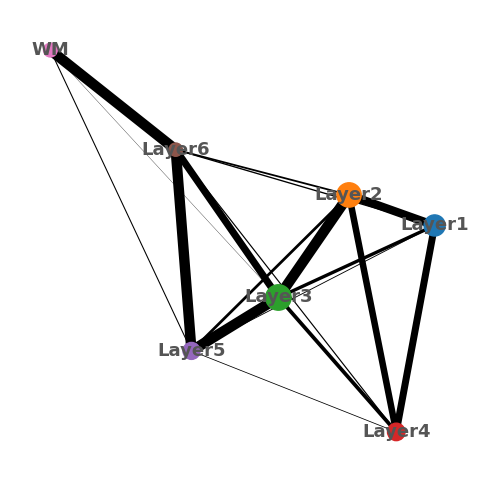

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151509
[10] Processing 151507
col_0     1    2    3   4    5    6    7
row_0                                   
Layer1   33    0    0   1    0    0  783
Layer2  300    0    0   0    0    0    5
Layer3  463  688    0  63    1    0    0
Layer4    0  321    0  31   17    0    0
Layer5    0  126    0  24  525    0    0
Layer6    0    0    1  12  465    6    2
WM        0    0  108   0   66  179    1
{'1': 'Layer2', '2': 'Layer3', '3': 'Layer6', '4': 'Layer4', '5': 'Layer5', '6': 'WM', '7': 'Layer1'}


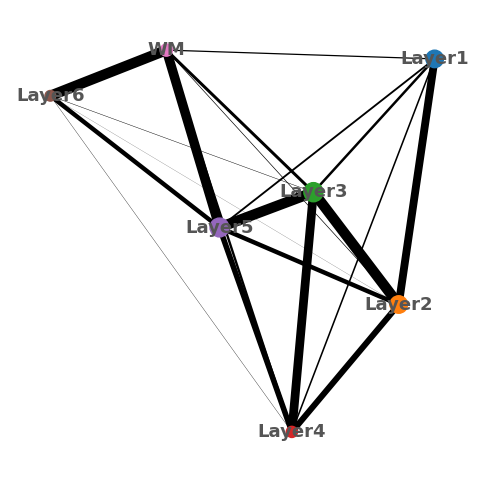

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151507
[11] Processing 151508
col_0     1    2    3    4    5    6   7
row_0                                   
Layer1   34  414    2    0  416    0   0
Layer2  276   12    1    0    6    0   0
Layer3  809    0   52    0    8  516   0
Layer4    0    0   23    0    1  349   0
Layer5    0    0  126    0    0  611   0
Layer6    2    0  218   21    3  245  36
WM        0    0   11  177    0    1  11
{'1': 'Layer3', '2': 'Layer2', '3': 'Layer6', '4': 'WM', '5': 'Layer1', '6': 'Layer5', '7': 'Layer4'}


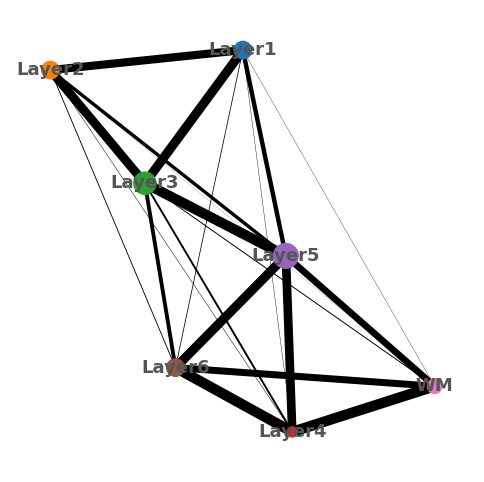

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151508
[12] Processing 151676
col_0     1    2    3    4    5    6    7
row_0                                    
Layer1  244    0    0   20    0   25    0
Layer2   34    0    0  169    0   51    0
Layer3    1    0   19  424    0  392    0
Layer4    0    0  125   46    0   83    0
Layer5    1    0  545    0    0   98    5
Layer6    0   54  300    0    1    8  253
WM        0  288    0    0  237    0    8
{'1': 'Layer1', '2': 'WM', '3': 'Layer5', '4': 'Layer2', '5': 'Layer4', '6': 'Layer3', '7': 'Layer6'}


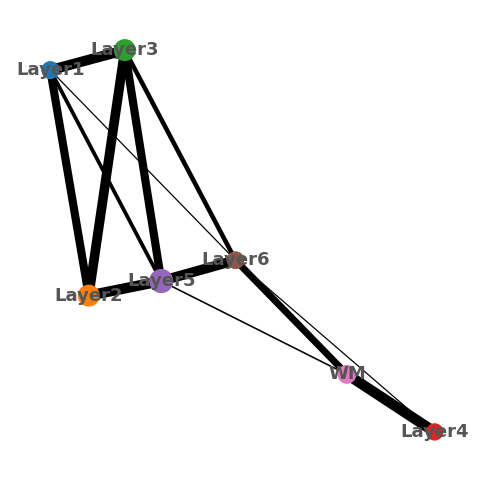

==> Results saved to ../Results/results_trajectory/DLPFC/stLearn/151676
================= Finished stLearn DLPFC =================


In [ ]:
print(f'================= Processing {method} {dataset} =================')
metrics_list = []
for i, file in enumerate(files):
    section_id = file.split('/')[-1]
    out_path = os.path.join(output_dir, section_id)
    os.makedirs(out_path, exist_ok=True)
    
    print(f'[{i + 1}] Processing {section_id}')

    file_path = os.path.join(data_folder, section_id)

    adata = sc.read_visium(file_path, count_file='filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique()
    metadata = pd.read_csv(file + '/cell_metadata.csv', index_col=0)
    gt_metadata = pd.read_csv(os.path.join(file_path, 'metadata.tsv'), sep='\t')

    adata.obs['gt'] = gt_metadata['layer_guess'].values
    adata = adata[~pd.isnull(adata.obs['gt'])]
    metadata = metadata[~pd.isnull(metadata['ground_truth'])]

    # Match metadata and adata
    adata = adata[adata.obs.index.isin(metadata.index)]
    metadata = metadata.loc[adata.obs.index]
    gt_metadata = gt_metadata.loc[adata.obs.index]

    # metadata = metadata.set_index(['array_row', 'array_col'])
    # adata.obs = adata.obs.set_index(['array_row', 'array_col'])
    # metadata = metadata.loc[adata.obs.index]

    pred = metadata[pred_key].values
    if min(pred) == 0:
        pred += 1

    adata.obs['gt'] = adata.obs['gt'].astype(str)
    adata.obs['pred'] = pred.astype(str)

    adata = assign_labels(adata)
    adata = process_adata(adata)
    plot_trajectory(adata, out_path)
    print(f'==> Results saved to {out_path}')
    # break

print(f'================= Finished {method} {dataset} =================')